In [1]:
import numpy as np  # for handling multi-dimensional array operation
import pandas as pd  # for reading data from csv 
import statsmodels.api as sm  # for finding the p-value
from sklearn.preprocessing import MinMaxScaler  # for normalization
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.utils import shuffle
from sklearn import svm
from numpy import mean
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold

## CHART-EVENTS DATA

In [2]:
chart24 = pd.read_csv('./chart24.csv')

#EXTRACT FEATURES AND LABELS
Y24 = chart24['aki_flag'] 
X24 = chart24.iloc[:,2:] 

#FILL MISSING WITH MEAN IMPUTATION
X24 = X24.fillna(X24.mean())

#NORMALIZATION WITH MIN-MAX SCALER 0-1
scaler = MinMaxScaler()
X24 = scaler.fit_transform(X24)

#SPLIT DATASET INTO TRAINING AND TESTING SETS
X_train24, X_test24, y_train24, y_test24 = tts(X24, Y24, test_size=0.3, random_state=42)

In [3]:
chart48 = pd.read_csv('./chart48.csv')

Y48 = chart48['aki_flag'] #all rows of 'aki_flag' as LABELS
X48 = chart48.iloc[:,2:]  #features

#FILL MISSING WITH MEAN IMPUTATION
X48 = X48.fillna(X48.mean())

#NORMALIZATION WITH MIN-MAX SCALER 0-1
X48 = scaler.fit_transform(X48)

#SPLIT DATASET INTO TRAINING AND TESTING SETS
X_train48, X_test48, y_train48, y_test48 = tts(X48, Y48, test_size=0.3, random_state=42)

In [4]:
#APPLY THE SMOTE TOMEK-LINKS TECHNIQUE TO COPE WITH CLASS IMBALANCE PROBLEM 
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

#DEFINE THE PARAMETERS TO BE TESTED IN THE GRID SEARCH
params = [
  {'C': [0.1, 0.5, 0.75, 1, 10 ], 'kernel': ['poly'], 'degree': [1,2,3,4,6]},
  {'C': [0.1, 0.5, 0.75, 1, 10 ], 'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1]},
] 

In [6]:
gs24 = GridSearchCV(svm.SVC(), params, refit = True, verbose = 3)
p24 = Pipeline(steps=[('r', resample), ('gs', gs24)])

gs48 = GridSearchCV(svm.SVC(), params, refit = True, verbose = 3)
p48 = Pipeline(steps=[('r', resample), ('gs', gs48)])

Now fit the grid search and extract the best parameters/estimator to be used fro the prediction 

In [6]:
gs24.fit(X_train24, y_train24)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END ......C=0.1, degree=1, kernel=poly;, score=0.706 total time=  52.5s
[CV 2/5] END ......C=0.1, degree=1, kernel=poly;, score=0.706 total time= 1.1min
[CV 3/5] END ......C=0.1, degree=1, kernel=poly;, score=0.705 total time= 1.1min
[CV 4/5] END ......C=0.1, degree=1, kernel=poly;, score=0.705 total time=  58.4s
[CV 5/5] END ......C=0.1, degree=1, kernel=poly;, score=0.705 total time=  59.5s
[CV 1/5] END ......C=0.1, degree=2, kernel=poly;, score=0.706 total time= 1.2min
[CV 2/5] END ......C=0.1, degree=2, kernel=poly;, score=0.706 total time= 1.2min
[CV 3/5] END ......C=0.1, degree=2, kernel=poly;, score=0.705 total time= 1.1min
[CV 4/5] END ......C=0.1, degree=2, kernel=poly;, score=0.705 total time= 1.2min
[CV 5/5] END ......C=0.1, degree=2, kernel=poly;, score=0.705 total time= 1.2min
[CV 1/5] END ......C=0.1, degree=3, kernel=poly;, score=0.706 total time= 1.3min
[CV 2/5] END ......C=0.1, degree=3, kernel=poly

[CV 2/5] END .......C=10, degree=1, kernel=poly;, score=0.706 total time= 2.2min
[CV 3/5] END .......C=10, degree=1, kernel=poly;, score=0.705 total time= 1.8min
[CV 4/5] END .......C=10, degree=1, kernel=poly;, score=0.705 total time= 1.7min
[CV 5/5] END .......C=10, degree=1, kernel=poly;, score=0.705 total time= 1.5min
[CV 1/5] END .......C=10, degree=2, kernel=poly;, score=0.706 total time= 2.0min
[CV 2/5] END .......C=10, degree=2, kernel=poly;, score=0.705 total time= 1.8min
[CV 3/5] END .......C=10, degree=2, kernel=poly;, score=0.705 total time= 2.9min
[CV 4/5] END .......C=10, degree=2, kernel=poly;, score=0.705 total time= 2.8min
[CV 5/5] END .......C=10, degree=2, kernel=poly;, score=0.707 total time= 2.0min
[CV 1/5] END .......C=10, degree=3, kernel=poly;, score=0.707 total time= 3.1min
[CV 2/5] END .......C=10, degree=3, kernel=poly;, score=0.707 total time= 3.1min
[CV 3/5] END .......C=10, degree=3, kernel=poly;, score=0.705 total time= 4.1min
[CV 4/5] END .......C=10, de

[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.705 total time= 1.2min
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.705 total time= 1.1min
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.706 total time=  54.4s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.706 total time=  54.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.705 total time=  55.2s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.705 total time=  53.5s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.705 total time=  54.2s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.706 total time=  57.1s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.706 total time=  58.5s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.705 total time=  57.6s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.705 total time=  57.7s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.705 total time=  58.1s
[CV 1/5] END .......C=10, ga

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 0.5, 0.75, 1, 10],
                          'degree': [1, 2, 3, 4, 6], 'kernel': ['poly']},
                         {'C': [0.1, 0.5, 0.75, 1, 10],
                          'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']}],
             verbose=3)

In [7]:
print("The best parameters found for the 24h DCW:")
print(gs24.best_params_)
  
#PRINT HOW OUR MODEL LOOKS AFTER HYPER-PARAMETER TUNING
print("The best estimator found for the 24h DCW:")
print(gs24.best_estimator_)

The best parameters found for the 24h DCW:
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
The best estimator found for the 24h DCW:
SVC(C=10, gamma=1)


In [8]:
gs48.fit(X_train48, y_train48)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END ......C=0.1, degree=1, kernel=poly;, score=0.764 total time=   7.7s
[CV 2/5] END ......C=0.1, degree=1, kernel=poly;, score=0.764 total time=   7.9s
[CV 3/5] END ......C=0.1, degree=1, kernel=poly;, score=0.763 total time=   7.9s
[CV 4/5] END ......C=0.1, degree=1, kernel=poly;, score=0.764 total time=   8.0s
[CV 5/5] END ......C=0.1, degree=1, kernel=poly;, score=0.764 total time=   7.8s
[CV 1/5] END ......C=0.1, degree=2, kernel=poly;, score=0.764 total time=  10.1s
[CV 2/5] END ......C=0.1, degree=2, kernel=poly;, score=0.764 total time=  10.8s
[CV 3/5] END ......C=0.1, degree=2, kernel=poly;, score=0.763 total time=  10.4s
[CV 4/5] END ......C=0.1, degree=2, kernel=poly;, score=0.764 total time=  10.9s
[CV 5/5] END ......C=0.1, degree=2, kernel=poly;, score=0.764 total time=  11.1s
[CV 1/5] END ......C=0.1, degree=3, kernel=poly;, score=0.764 total time=  14.3s
[CV 2/5] END ......C=0.1, degree=3, kernel=poly

[CV 2/5] END .......C=10, degree=1, kernel=poly;, score=0.764 total time=  17.7s
[CV 3/5] END .......C=10, degree=1, kernel=poly;, score=0.762 total time=  23.8s
[CV 4/5] END .......C=10, degree=1, kernel=poly;, score=0.764 total time=  32.4s
[CV 5/5] END .......C=10, degree=1, kernel=poly;, score=0.764 total time=  18.3s
[CV 1/5] END .......C=10, degree=2, kernel=poly;, score=0.764 total time= 2.2min
[CV 2/5] END .......C=10, degree=2, kernel=poly;, score=0.763 total time= 1.2min
[CV 3/5] END .......C=10, degree=2, kernel=poly;, score=0.762 total time= 1.4min
[CV 4/5] END .......C=10, degree=2, kernel=poly;, score=0.764 total time= 1.1min
[CV 5/5] END .......C=10, degree=2, kernel=poly;, score=0.764 total time= 1.3min
[CV 1/5] END .......C=10, degree=3, kernel=poly;, score=0.764 total time= 1.8min
[CV 2/5] END .......C=10, degree=3, kernel=poly;, score=0.763 total time= 1.4min
[CV 3/5] END .......C=10, degree=3, kernel=poly;, score=0.762 total time= 1.3min
[CV 4/5] END .......C=10, de

[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.764 total time=  19.4s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.764 total time=  19.7s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.764 total time=  12.3s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.764 total time=  13.3s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.763 total time=  13.3s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.764 total time=  12.3s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.764 total time=  13.2s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.764 total time=  14.7s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.764 total time=  15.3s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.763 total time=  14.1s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.764 total time=  14.1s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.764 total time=  13.9s
[CV 1/5] END .......C=10, ga

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 0.5, 0.75, 1, 10],
                          'degree': [1, 2, 3, 4, 6], 'kernel': ['poly']},
                         {'C': [0.1, 0.5, 0.75, 1, 10],
                          'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']}],
             verbose=3)

In [9]:
print("The best parameters found for the 48h DCW:")
print(gs48.best_params_)
  
#PRINT HOW OUR MODEL LOOKS AFTER HYPER-PARAMETER TUNING
print("The best estimator found for the 48h DCW:")
print(gs48.best_estimator_)

The best parameters found for the 48h DCW:
{'C': 0.5, 'degree': 6, 'kernel': 'poly'}
The best estimator found for the 48h DCW:
SVC(C=0.5, degree=6, kernel='poly')


In [7]:
best24 = svm.SVC(C=10, gamma=1, kernel = 'rbf' )
best48 = svm.SVC(C=0.5, degree=6, kernel='poly' )

In [11]:
y_pred24 = cross_val_predict(best24, X24, Y24, cv = 5, verbose = 3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 17.8min finished


In [12]:
y_pred48 = cross_val_predict(best48, X48, Y48, cv = 5, verbose = 3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.6min finished


In [13]:
#CLASSIFICATION REPORT 24H
print(classification_report(Y24, y_pred24))

              precision    recall  f1-score   support

           0       0.71      0.99      0.82     10761
           1       0.52      0.03      0.06      4521

    accuracy                           0.70     15282
   macro avg       0.61      0.51      0.44     15282
weighted avg       0.65      0.70      0.60     15282



In [14]:
#CLASSIFICATION REPORT 48H
print(classification_report(Y48, y_pred48))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      6021
           1       0.36      0.00      0.00      1841

    accuracy                           0.77      7862
   macro avg       0.56      0.50      0.44      7862
weighted avg       0.67      0.77      0.67      7862



Elapsed time to compute the importances: 0.073 seconds


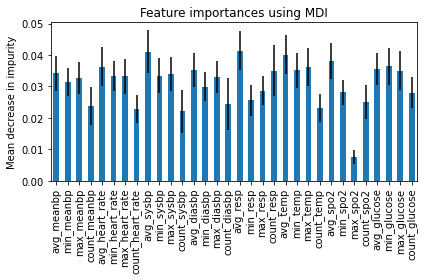

In [20]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#FEATURES SELECTION BASED ON THEIR IMPORTANCE WITH A RANDOM FOREST CLASSIFIER 
feature_names24 = [f'feature {i}' for i in range(X24.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train24, y_train24)

import time

start_time24 = time.time()
importances24 = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time24 = time.time() - start_time24

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time24:.3f} seconds")

forest_importances24 = pd.Series(importances24, index=chart24.columns[2:])

fig, ax = plt.subplots()
forest_importances24.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [18]:
for i,v in enumerate(importances24):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.03420
Feature: 1, Score: 0.03156
Feature: 2, Score: 0.03269
Feature: 3, Score: 0.02370
Feature: 4, Score: 0.03623
Feature: 5, Score: 0.03328
Feature: 6, Score: 0.03321
Feature: 7, Score: 0.02286
Feature: 8, Score: 0.04111
Feature: 9, Score: 0.03343
Feature: 10, Score: 0.03396
Feature: 11, Score: 0.02209
Feature: 12, Score: 0.03525
Feature: 13, Score: 0.02994
Feature: 14, Score: 0.03309
Feature: 15, Score: 0.02440
Feature: 16, Score: 0.04136
Feature: 17, Score: 0.02557
Feature: 18, Score: 0.02872
Feature: 19, Score: 0.03497
Feature: 20, Score: 0.04016
Feature: 21, Score: 0.03511
Feature: 22, Score: 0.03612
Feature: 23, Score: 0.02308
Feature: 24, Score: 0.03813
Feature: 25, Score: 0.02817
Feature: 26, Score: 0.00761
Feature: 27, Score: 0.02499
Feature: 28, Score: 0.03551
Feature: 29, Score: 0.03646
Feature: 30, Score: 0.03503
Feature: 31, Score: 0.02802


Elapsed time to compute the importances: 0.059 seconds


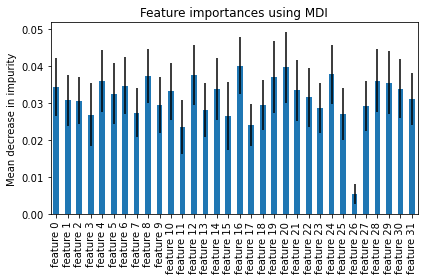

In [19]:
#DO IT FOR THE 48H DCW NOW
feature_names48 = [f'feature {i}' for i in range(X48.shape[1])]
#forest = RandomForestClassifier(random_state=0)
forest.fit(X_train48, y_train48)

start_time48 = time.time()
importances48 = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time48 = time.time() - start_time48

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time48:.3f} seconds")

forest_importances48 = pd.Series(importances48, index=chart48.columns[2:])

fig, ax = plt.subplots()
forest_importances48.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [20]:
for i,v in enumerate(importances48):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.03416
Feature: 1, Score: 0.03065
Feature: 2, Score: 0.03061
Feature: 3, Score: 0.02672
Feature: 4, Score: 0.03590
Feature: 5, Score: 0.03239
Feature: 6, Score: 0.03464
Feature: 7, Score: 0.02732
Feature: 8, Score: 0.03725
Feature: 9, Score: 0.02942
Feature: 10, Score: 0.03315
Feature: 11, Score: 0.02357
Feature: 12, Score: 0.03744
Feature: 13, Score: 0.02805
Feature: 14, Score: 0.03377
Feature: 15, Score: 0.02632
Feature: 16, Score: 0.04002
Feature: 17, Score: 0.02408
Feature: 18, Score: 0.02944
Feature: 19, Score: 0.03699
Feature: 20, Score: 0.03955
Feature: 21, Score: 0.03334
Feature: 22, Score: 0.03150
Feature: 23, Score: 0.02856
Feature: 24, Score: 0.03763
Feature: 25, Score: 0.02697
Feature: 26, Score: 0.00529
Feature: 27, Score: 0.02922
Feature: 28, Score: 0.03591
Feature: 29, Score: 0.03538
Feature: 30, Score: 0.03381
Feature: 31, Score: 0.03092


### Apply the cross_validate( ) function now:

In [5]:
#DEFINE THE METRICS 
scoring=['accuracy','precision','recall', 'roc_auc', 'f1']

In [8]:
p24 = Pipeline(steps=[('r', resample), ('m', best24)])

scores24 = cross_validate(p24, X24, Y24, scoring = scoring, cv = 5)

In [10]:
scores24['test_accuracy'].mean()

0.6137287908448037

In [11]:
scores24['test_precision'].mean()

0.3847586713951897

In [12]:
scores24['test_recall'].mean()

0.5107177431183689

In [13]:
scores24['test_f1'].mean()

0.43865472164952835

In [14]:
scores24['test_roc_auc'].mean()

0.6165054734401278

In [9]:
p48 = Pipeline(steps=[('r', resample), ('m', best48)])

scores48 = cross_validate(p48, X48, Y48, scoring = scoring, cv = 5)

In [15]:
scores48['test_accuracy'].mean()

0.5910724713639357

In [16]:
scores48['test_precision'].mean()

0.29056488231070615

In [17]:
scores48['test_recall'].mean()

0.5160318722752445

In [18]:
scores48['test_f1'].mean()

0.3717116943250528

In [19]:
scores48['test_roc_auc'].mean()

0.593239463945384